# <center><font color = '#DF9166' size = 20 center> **Car Insurance Data Exploration**</font></center>




## <font color = '#DF9166' size=6>**Table of content**<font/><a class = 'anchor' id = 'introduction'/>

1. [**Import Libraries**](#import)
2. [**Data Loading**](#data_loading)
3. [**Data Inspection**](#data_inspection)
4. [**Data Preprocessing**](#data_preprocessing)
5. [**Vehicle Analysis**](#vehicle_analysis)
6. [**Client Analysis**](#client_analysis)
7. [**Region Analysis**](#region_analysis)
8. [**Policy Analysis**](#policy_analysis)
9. [**Trend Analysis**](#trend_analysis)

## <font color = '#DF9166' size=6>**Import Libraries**<font/><a class = 'anchor' id = 'import'/>


In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.pardir))

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

In [3]:
from src.preprocess_data import *

In [4]:
sns.set_style("whitegrid")

In [5]:
pd.set_option("display.max_colwidth", None)
pd.set_option('display.max_columns', None)

## <font color = '#DF9166' size=6>**Data Loading**<font/><a class = 'anchor' id = 'data_loading'/>

In [6]:
DATA_PATH = '../data/MachineLearningRating_v3.txt'

In [7]:
df = pd.read_csv(DATA_PATH, delimiter='|')
df.head(2)

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,MaritalStatus,Gender,Country,Province,PostalCode,MainCrestaZone,SubCrestaZone,ItemType,mmcode,VehicleType,RegistrationYear,make,Model,Cylinders,cubiccapacity,kilowatts,bodytype,NumberOfDoors,VehicleIntroDate,CustomValueEstimate,AlarmImmobiliser,TrackingDevice,CapitalOutstanding,NewVehicle,WrittenOff,Rebuilt,Converted,CrossBorder,NumberOfVehiclesInFleet,SumInsured,TermFrequency,CalculatedPremiumPerTerm,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,Not specified,Not specified,South Africa,Gauteng,1459,Rand East,Rand East,Mobility - Motor,44069150.0,Passenger Vehicle,2004,MERCEDES-BENZ,E 240,6.0,2597.0,130.0,S/D,4.0,6/2002,119300.0,Yes,No,119300,More than 6 months,NaN,NaN,NaN,NaN,NaN,0.01,Monthly,25.0,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,Not specified,Not specified,South Africa,Gauteng,1459,Rand East,Rand East,Mobility - Motor,44069150.0,Passenger Vehicle,2004,MERCEDES-BENZ,E 240,6.0,2597.0,130.0,S/D,4.0,6/2002,119300.0,Yes,No,119300,More than 6 months,NaN,NaN,NaN,NaN,NaN,0.01,Monthly,25.0,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0


## <font color = '#DF9166' size=6>**Data Inspection**<font/><a class = 'anchor' id = 'data_inspection'/>

In [8]:
print(f"Shape of the Dataset: {df.shape}")

Shape of the Dataset: (1000098, 52)


In [9]:
print("Dataset Info:\n")
df.info()

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UnderwrittenCoverID       1000098 non-null  int64  
 1   PolicyID                  1000098 non-null  int64  
 2   TransactionMonth          1000098 non-null  object 
 3   IsVATRegistered           1000098 non-null  bool   
 4   Citizenship               1000098 non-null  object 
 5   LegalType                 1000098 non-null  object 
 6   Title                     1000098 non-null  object 
 7   Language                  1000098 non-null  object 
 8   Bank                      854137 non-null   object 
 9   AccountType               959866 non-null   object 
 10  MaritalStatus             991839 non-null   object 
 11  Gender                    990562 non-null   object 
 12  Country                   1000098 non-null  object 
 13  Province    

The dataset consists of 1,000,098 rows and 52 columns. It include the following columns:

1. **Policy & Customer Info**:  
   - `PolicyID`, `UnderwrittenCoverID`: Unique identifiers for policies.  
   - `Citizenship`, `LegalType`, `Title`, `Gender`, `MaritalStatus`, `Language`: Customer demographics.  

2. **Vehicle Details**:  
   - `VehicleType`, `make`, `Model`, `bodytype`: Vehicle specifics.  
   - `RegistrationYear`, `VehicleIntroDate`: Registration and introduction dates.  
   - `Cylinders`, `cubiccapacity`, `kilowatts`, `NumberOfDoors`: Technical specifications.  

3. **Geographic Info**:  
   - `Country`, `Province`, `PostalCode`, `MainCrestaZone`, `SubCrestaZone`: Location details.  

4. **Insurance Coverage**:  
   - `SumInsured`, `CalculatedPremiumPerTerm`, `TotalPremium`, `TotalClaims`: Financial metrics.  
   - `CoverCategory`, `CoverType`, `CoverGroup`, `Section`, `Product`, `StatutoryClass/RiskType`: Coverage classifications.  

5. **Security Features**:  
   - `AlarmImmobiliser`, `TrackingDevice`: Security measures.  

6. **Anomalies and Customizations**:  
   - `WrittenOff`, `Rebuilt`, `Converted`, `CustomValueEstimate`, `CrossBorder`: Special cases and customizations.  

7. **Banking Info**:  
   - `Bank`, `AccountType`: Payment-related details.  

8. **Frequency and Premiums**:  
   - `TermFrequency`, `ExcessSelected`: Payment and premium terms.  

In [10]:
print("Number of Unique Values in Each Column:\n")
print("_" * 70, f"{'Column Name':>45} |  Unique Values", "_" * 70, sep="\n")
for col in df.columns:
    print(f"{col:>45} | {df[col].nunique()}")
print("_" * 70)

Number of Unique Values in Each Column:

______________________________________________________________________
                                  Column Name |  Unique Values
______________________________________________________________________
                          UnderwrittenCoverID | 116532
                                     PolicyID | 7000
                             TransactionMonth | 23
                              IsVATRegistered | 2
                                  Citizenship | 4
                                    LegalType | 6
                                        Title | 5
                                     Language | 1
                                         Bank | 11
                                  AccountType | 3
                                MaritalStatus | 3
                                       Gender | 3
                                      Country | 1
                                     Province | 9
                                   PostalCod

We can infer the column data type based on the value count of the column:

**Numerical Columns**:  Many unique values indicate continuous or measured data, often representing variability in metrics or physical characteristics.
- **Policy Specs**: `SumInsured`, `CalculatedPremiumPerTerm`, `TotalPremium`, `TotalClaims`– Likely related to financial metrics, essential for evaluating premiums and claims.  
- **Vehicle Attributes**: `RegistrationYear`, `Cylinders`, `cubiccapacity`, `kilowatts`, `NumberOfDoors` – Describing physical or temporal characteristics of vehicles.

**Categorical Columns**:  Few unique values suggest discrete groups, classifications, or binary states.
- **Identifiers**: `UnderwrittenCoverID`, `PolicyID` – Unique identifiers for records.  
- **Demographics**: `Citizenship`, `LegalType`, `Gender`, `MaritalStatus`, `Province`, `PostalCode`, `MainCrestaZone`, `SubCrestaZone` – Capture customer and regional details.  
- **Vehicle Details**: `make`, `Model`, `VehicleType`, `bodytype` – Differentiate vehicles by type and classification.  
- **Policy Features**: `TermFrequency`, `ExcessSelected`, `CoverCategory`, `CoverType`, `CoverGroup` – Define coverage details and terms.  
- **Binary Categories**: `IsVATRegistered`, `AlarmImmobiliser`, `TrackingDevice`, `NewVehicle`, `WrittenOff`, `Rebuilt`, `Converted` – Indicate binary states, such as yes/no, installed/not installed.  

In [11]:
categorical_columns = [
    "UnderwrittenCoverID", "PolicyID", "TransactionMonth", "IsVATRegistered", 
    "Citizenship", "LegalType", "Title", "Language", "Bank", "AccountType", 
    "MaritalStatus", "Gender", "Country", "Province", "PostalCode", 
    "MainCrestaZone", "SubCrestaZone", "ItemType", "VehicleType", "make", 
    "Model", "bodytype", "VehicleIntroDate", "AlarmImmobiliser", 
    "TrackingDevice", "CapitalOutstanding", "NewVehicle", "WrittenOff", 
    "Rebuilt", "Converted", "CrossBorder", "TermFrequency", "ExcessSelected", 
    "CoverCategory", "CoverType", "CoverGroup", "Section", "Product", 
    "StatutoryClass", "StatutoryRiskType",
]

numerical_columns = [
    "mmcode", "RegistrationYear", "Cylinders", "cubiccapacity", "kilowatts", 
    "NumberOfDoors", "CustomValueEstimate", "NumberOfVehiclesInFleet", 
    "SumInsured", "CalculatedPremiumPerTerm", "TotalPremium", "TotalClaims", 
]


In [12]:
df[categorical_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 40 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   UnderwrittenCoverID  1000098 non-null  int64 
 1   PolicyID             1000098 non-null  int64 
 2   TransactionMonth     1000098 non-null  object
 3   IsVATRegistered      1000098 non-null  bool  
 4   Citizenship          1000098 non-null  object
 5   LegalType            1000098 non-null  object
 6   Title                1000098 non-null  object
 7   Language             1000098 non-null  object
 8   Bank                 854137 non-null   object
 9   AccountType          959866 non-null   object
 10  MaritalStatus        991839 non-null   object
 11  Gender               990562 non-null   object
 12  Country              1000098 non-null  object
 13  Province             1000098 non-null  object
 14  PostalCode           1000098 non-null  int64 
 15  MainCrestaZone 

Some categorical columns are stored as integers (`int64`) because their values are numerical representations of categories (e.g., `UnderwrittenCoverID`, `PostalCode`). This occurs when:  

1. **IDs or Codes**: These integers uniquely identify categories or records but don't have a numerical meaning (e.g., `PolicyID`, `UnderwrittenCoverID`).  
2. **Ordinal Data**: Numbers represent ranked categories.  

Conversion to categorical types ensures appropriate analysis and processing.

In [13]:
columns_to_convert = ["UnderwrittenCoverID", "PostalCode", "PolicyID"]
df[columns_to_convert] = df[columns_to_convert].astype('object')

In [14]:
print("Missing values and their proportions (%):")
missing_values_proportions(df)

Missing values and their proportions (%):


,Missing Values,Proportion (%)
Bank,145961,14.59
AccountType,40232,4.02
MaritalStatus,8259,0.83
Gender,9536,0.95
mmcode,552,0.06
VehicleType,552,0.06
make,552,0.06
Model,552,0.06
Cylinders,552,0.06
cubiccapacity,552,0.06


The missing values and their proportions provide insights into data quality and usability:

- **No Missing Values (0%)**: Columns like `UnderwrittenCoverID`, `PolicyID`, `TransactionMonth`, and `Citizenship` are complete and ready for analysis.  
- **Low Missing Values (<1%)**: Columns such as `MaritalStatus` (0.83%) and `Gender` (0.95%) have minimal gaps. Drop rows or impute using mode/median.  
- **Moderate Missing Values (1%-15%)**: Examples include `Bank` (14.59%) and `NewVehicle` (15.33%). Manageable via imputation.  
- **High Missing Values (>50%)**: Sparse columns like `CustomValueEstimate` (77.96%) and `CrossBorder` (99.93%) may be dropped, or require domain-specific handling.  
- **Completely Missing (100%)**: `NumberOfVehiclesInFleet` is irrelevant unless future data is expected.  

In [15]:
duplicate_rows = df[df.duplicated()]
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")

Number of duplicate rows: 0


In [16]:
print("Summary statistics for numerical columns:\n")
df[numerical_columns].describe().transpose()

Summary statistics for numerical columns:



,count,mean,std,min,25%,50%,75%,max
mmcode,999546.0,5.487770e+07,1.360381e+07,4.041200e+06,6.005692e+07,6.005842e+07,6.005842e+07,6.506535e+07
RegistrationYear,1000098.0,2.010225e+03,3.261391e+00,1.987000e+03,2.008000e+03,2.011000e+03,2.013000e+03,2.015000e+03
Cylinders,999546.0,4.046642e+00,2.940201e-01,0.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,1.000000e+01
cubiccapacity,999546.0,2.466743e+03,4.428006e+02,0.000000e+00,2.237000e+03,2.694000e+03,2.694000e+03,1.288000e+04
kilowatts,999546.0,9.720792e+01,1.939326e+01,0.000000e+00,7.500000e+01,1.110000e+02,1.110000e+02,3.090000e+02
NumberOfDoors,999546.0,4.019250e+00,4.683144e-01,0.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,6.000000e+00
CustomValueEstimate,220456.0,2.255311e+05,5.645157e+05,2.000000e+04,1.350000e+05,2.200000e+05,2.800000e+05,2.655000e+07
NumberOfVehiclesInFleet,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SumInsured,1000098.0,6.041727e+05,1.508332e+06,1.000000e-02,5.000000e+03,7.500000e+03,2.500000e+05,1.263620e+07
CalculatedPremiumPerTerm,1000098.0,1.178757e+02,3.997017e+02,0.000000e+00,3.224800e+00,8.436900e+00,9.000000e+01,7.442217e+04


In [17]:
print("Summary statistics for categorical columns:\n")
df[categorical_columns].describe(include=['object']).transpose()

Summary statistics for categorical columns:



,count,unique,top,freq
UnderwrittenCoverID,1000098,116532,85639,30
PolicyID,1000098,7000,3870,10400
TransactionMonth,1000098,23,2015-08-01 00:00:00,106747
Citizenship,1000098,4,,895210
LegalType,1000098,6,Individual,911929
Title,1000098,5,Mr,933555
Language,1000098,1,English,1000098
Bank,854137,11,First National Bank,260811
AccountType,959866,3,Current account,597938
MaritalStatus,991839,3,Not specified,986208


## <font color = '#DF9166' size=6>**Data Preprocessing**<font/><a class = 'anchor' id = 'data_preprocessing'/>

### Handling Missing Values

In [18]:
print("Missing values and their proportions (%):")
missing_values_proportions(df)

Missing values and their proportions (%):


,Missing Values,Proportion (%)
Bank,145961,14.59
AccountType,40232,4.02
MaritalStatus,8259,0.83
Gender,9536,0.95
mmcode,552,0.06
VehicleType,552,0.06
make,552,0.06
Model,552,0.06
Cylinders,552,0.06
cubiccapacity,552,0.06


The columns with over 60% missing data should be removed to reduce noise and unwanted bias through imputation. This ensures the dataset retains only reliable and informative features.

In [19]:
# Identify columns with more than 60% missing data and drop them
threshold = 0.6 * len(df)
columns_to_drop = [col for col in df.columns if df[col].isnull().sum() > threshold]
df.drop(columns=columns_to_drop, inplace=True)

# Remove from categorical_columns and numerical_columns
categorical_columns = [col for col in categorical_columns if col not in columns_to_drop]
numerical_columns = [col for col in numerical_columns if col not in columns_to_drop]

print(f"Dropped columns: {columns_to_drop}")

Dropped columns: ['CustomValueEstimate', 'WrittenOff', 'Rebuilt', 'Converted', 'CrossBorder', 'NumberOfVehiclesInFleet']


#### Handling Missing Categorical Columns

In [20]:
missing_proportions = missing_values_proportions(df)

In [21]:
# Extract missing proportions for categorical columns
missing_categorical_columns = [col for col in categorical_columns if col in missing_proportions.index]
missing_categorical = missing_proportions.loc[missing_categorical_columns]
print("Missing proportions for categorical columns:")
print(missing_categorical)

Missing proportions for categorical columns:
                    Missing Values  Proportion (%)
Bank                        145961           14.59
AccountType                  40232            4.02
MaritalStatus                 8259            0.83
Gender                        9536            0.95
VehicleType                    552            0.06
make                           552            0.06
Model                          552            0.06
bodytype                       552            0.06
VehicleIntroDate               552            0.06
CapitalOutstanding               2            0.00
NewVehicle                  153295           15.33


In [22]:
# Fill missing values in categorical columns with their respective modes
for col in missing_categorical_columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

#### Handling Missing Numerical Columns

In [23]:
missing_proportions = missing_values_proportions(df)

In [24]:
# Extract missing proportions for numerical columns
missing_numerical_columns = [col for col in numerical_columns if col in missing_proportions.index]
missing_numerical = missing_proportions.loc[missing_numerical_columns]
print("Missing proportions for numerical columns:")
print(missing_numerical)

Missing proportions for numerical columns:
               Missing Values  Proportion (%)
mmcode                    552            0.06
Cylinders                 552            0.06
cubiccapacity             552            0.06
kilowatts                 552            0.06
NumberOfDoors             552            0.06


In [25]:
# Fill missing values in numerical columns with their respective means
df[missing_numerical_columns] = df[missing_numerical_columns].fillna(df[missing_numerical_columns].mean())

In [26]:
print(f"Missing values(final check): {df.isna().sum().sum()}")

Missing values(final check): 0


### Handling Outliers

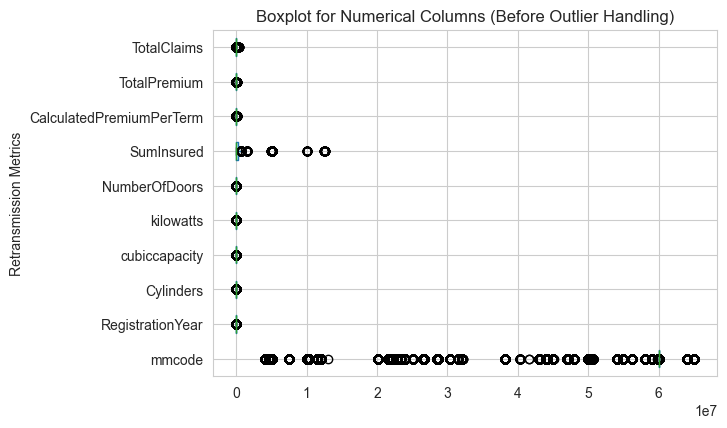

In [27]:
# Detect Outliers Using Boxplots
plt.figure(figsize=(6.5, 4.5))
df[numerical_columns].boxplot(vert=False)
plt.title("Boxplot for Numerical Columns (Before Outlier Handling)")
plt.ylabel("Retransmission Metrics")
plt.show()

In [28]:
# Replace outliers with boundaries for all numerical columns
df = handle_outliers(df, numerical_columns, plot_box=False, replace_with="mean")

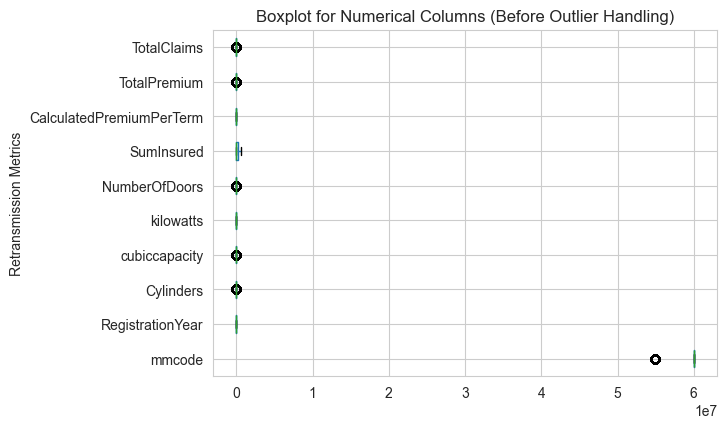

In [30]:
# Detect Outliers Using Boxplots
plt.figure(figsize=(6.5, 4.5))
df[numerical_columns].boxplot(vert=False)
plt.title("Boxplot for Numerical Columns (After Outlier Handling)")
plt.ylabel("Retransmission Metrics")
plt.show()

In [32]:
# Check for remaining outliers using Z-Score
print("\nColumns with Potential Outliers After Z-Score Analysis:\n")
for col in numerical_columns:
    z_scores = zscore(df[col])
    outliers = (np.abs(z_scores) > 3).sum()
    print(f"{col:>45}: {outliers} potential outliers")


Columns with Potential Outliers After Z-Score Analysis:

                                       mmcode: 0 potential outliers
                             RegistrationYear: 5858 potential outliers
                                    Cylinders: 34814 potential outliers
                                cubiccapacity: 23158 potential outliers
                                    kilowatts: 886 potential outliers
                                NumberOfDoors: 0 potential outliers
                                   SumInsured: 0 potential outliers
                     CalculatedPremiumPerTerm: 9662 potential outliers
                                 TotalPremium: 0 potential outliers
                                  TotalClaims: 2793 potential outliers


In [33]:
df.to_csv('../data/cleaned_data.csv')

## <font color = '#DF9166' size=6>**Vehicle Analysis**<font/><a class = 'anchor' id = 'vehicle_analysis'/>

In [274]:
print("\nTop 10 Vehicle Makes:")
print(df['make'].value_counts().head(10))


Top 10 Vehicle Makes:
make
TOYOTA                                 813832
MERCEDES-BENZ                           41940
CMC                                     21624
VOLKSWAGEN                              20929
C.A.M                                   16171
GOLDEN JOURNEY                          14462
NISSAN/DATSUN                           10997
JINBEI                                  10374
IVECO                                    8430
AUDI                                     7407
Name: count, dtype: int64


In [275]:
print("\nTop 10 Vehicle Models:")
print(df['Model'].value_counts().head(10))



Top 10 Vehicle Models:
Model
QUANTUM 2.7 SESFIKILE 16s         186639
QUANTUM 2.7 SESFIKILE 15s         167523
QUANTUM 2.7 SESFIKILE 14s         137242
QUANTUM 2.5 D-4D SESFIKILE 16s     99444
HiACE SUPER 16 F/Lift              79525
HiACE SIYAYA                       40960
QUANTUM 2.5 D-4D 14 SEAT           28773
AMANDLA 2.2                        16821
AVANZA 1.5 SX                      15828
INYATHI                            11265
Name: count, dtype: int64


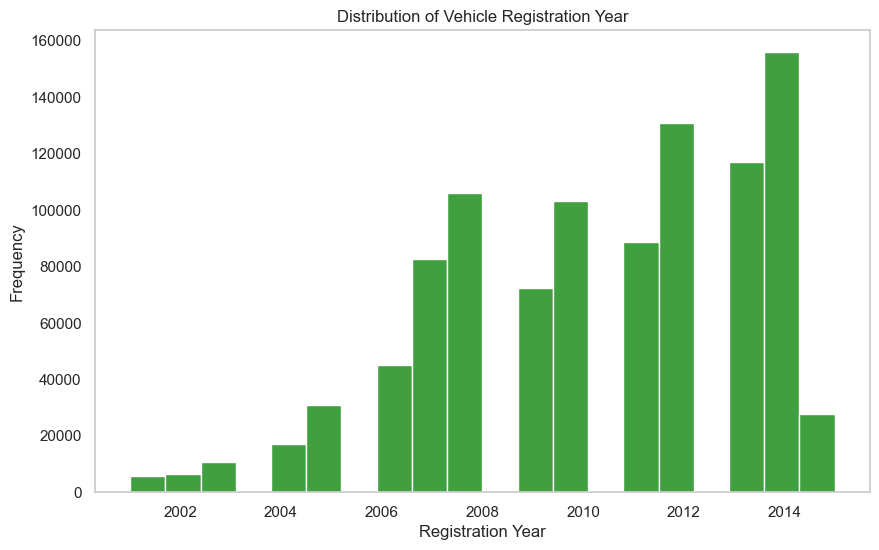

In [277]:
# Trends in RegistrationYear
plt.figure(figsize=(10, 6))
sns.histplot(df['RegistrationYear'], bins=20, kde=False, color="green")
plt.title("Distribution of Vehicle Registration Year")
plt.xlabel("Registration Year")
plt.ylabel("Frequency")
plt.grid()
plt.show()

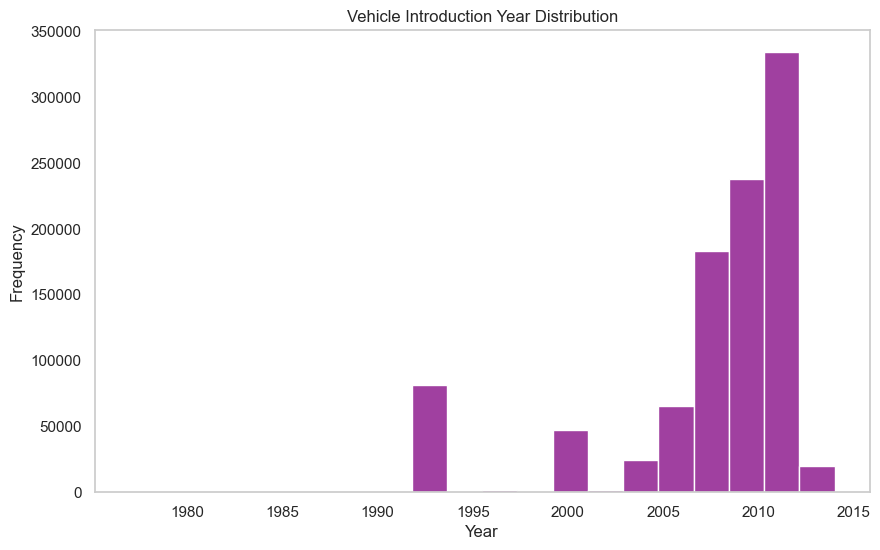

In [279]:
# Vehicle Intro Date
if 'VehicleIntroDate' in df.columns:
    df['VehicleIntroDate'] = pd.to_datetime(df['VehicleIntroDate'], errors='coerce')
    intro_year = df['VehicleIntroDate'].dt.year
    plt.figure(figsize=(10, 6))
    sns.histplot(intro_year, bins=20, kde=False, color="purple")
    plt.title("Vehicle Introduction Year Distribution")
    plt.xlabel("Year")
    plt.ylabel("Frequency")
    plt.grid()
    plt.show()

In [ ]:

# Analyze Vehicle Information
vehicle_columns = ['RegistrationYear', 'make', 'Model', 'Cylinders', 'cubiccapacity',
                   'kilowatts', 'bodytype', 'NumberOfDoors', 'VehicleIntroDate']

### Bodytype Preferences

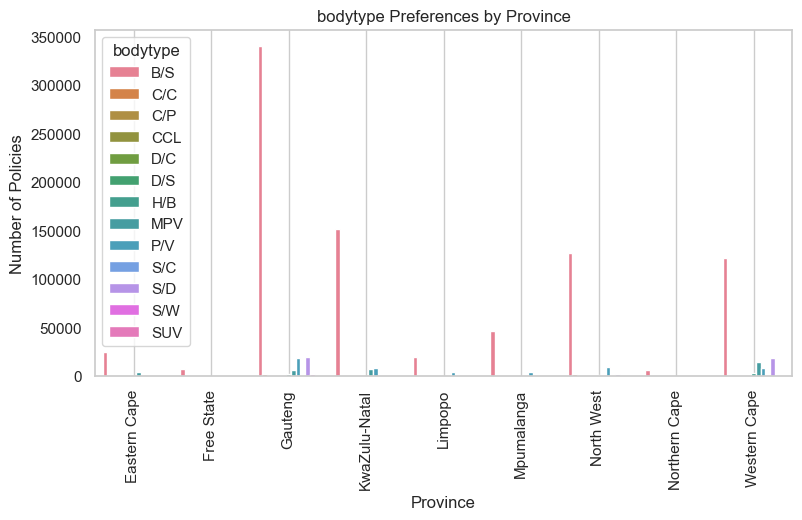

In [154]:
# Frequency of bodytype by Region
bodytype_region = df.groupby(['bodytype', 'Province'])['PolicyID'].count().reset_index()

plt.figure(figsize=(9, 4.5))
sns.barplot(data=bodytype_region, x='Province', y='PolicyID', hue='bodytype')
plt.title("bodytype Preferences by Province")
plt.xlabel("Province")
plt.ylabel("Number of Policies")
plt.xticks(rotation=90)
plt.grid()
plt.show()

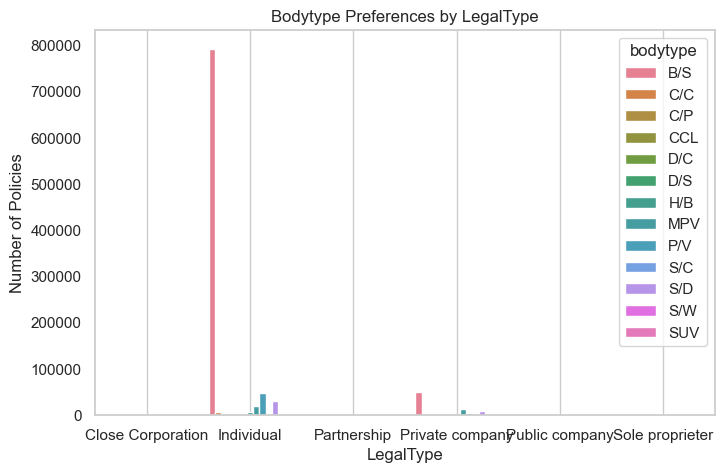

In [159]:
# Frequency of bodytype by LegalType
bodytype_legal_type = df.groupby(['bodytype', 'LegalType'])['PolicyID'].count().reset_index()

# Visualize bodytype preferences by LegalType
plt.figure(figsize=(8, 5))
sns.barplot(data=bodytype_legal_type, x='LegalType', y='PolicyID', hue='bodytype')
plt.title("Bodytype Preferences by LegalType")
plt.xlabel("LegalType")
plt.ylabel("Number of Policies")
plt.grid()
plt.show()


### Vehicle Performance and Risk Assessment

Lets investigate if certain VehicleType, Make, or Model are associated with higher claims

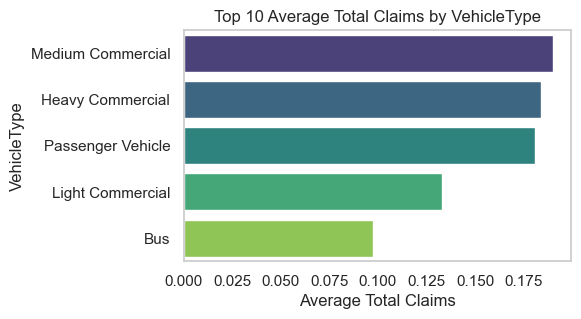

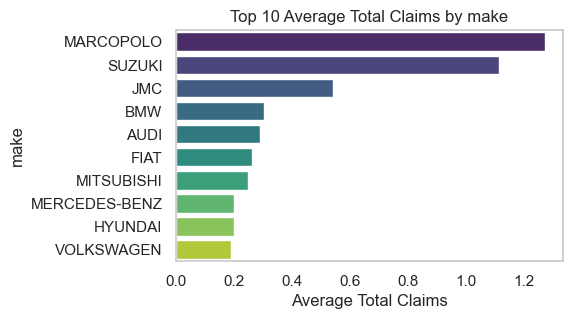

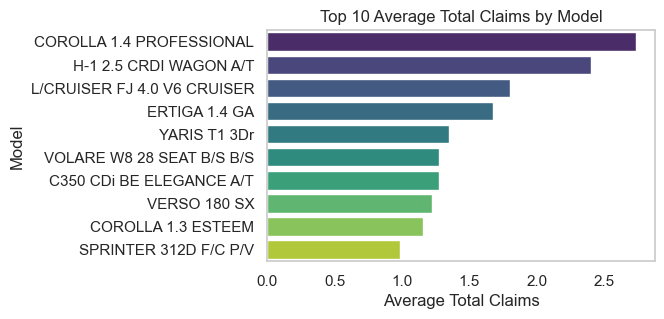

In [135]:
vehicle_categories = ['VehicleType', 'make', 'Model']

for category in vehicle_categories:
    # Compute the mean, sorting by descending mean
    data = (
        df.groupby(category)['TotalClaims']
        .mean()
        .sort_values(ascending=False)
        .head(10)
        .reset_index()
    )
    
    # Convert category column to string to avoid mixed type issues
    data[category] = data[category].astype(str).str.strip()
    
    plt.figure(figsize=(5, 3))
    sns.barplot(
        data=data,
        x='TotalClaims',
        y=category,
        palette="viridis"
    )
    
    # Set title and labels
    plt.title(f"Top 10 Average Total Claims by {category}")
    plt.xlabel("Average Total Claims")
    plt.ylabel(category)
    plt.grid(axis='x')  # Add a grid for better readability
    plt.show()


- **VehicleType**:  
  - `Medium Commercial` vehicles lead in claims, likely due to high usage.  
  - `Buses` have the fewest claims, indicating cautious operation or less usage.  

- **Make**:  
  - `MARCOPOLO` has the highest claims, tied to commercial use.  
  - `BMW` and `AUDI` show moderate claims, balancing performance and risk.  
  - `VOLKSWAGEN` ranks lowest among top 10 makes, suggesting reliability.  

- **Model**:  
  - `COROLLA 1.4 PROFESSIONAL` and `H-1 2.5 CRDI WAGON A/T` show the highest claims, indicating popularity or risk.  
  - `SPRINTER 312D F/C P/V` has the fewest claims among top models, implying lower risk.  

**Insight**: Commercial vehicles and popular models exhibit higher claims, highlighting areas for risk mitigation.

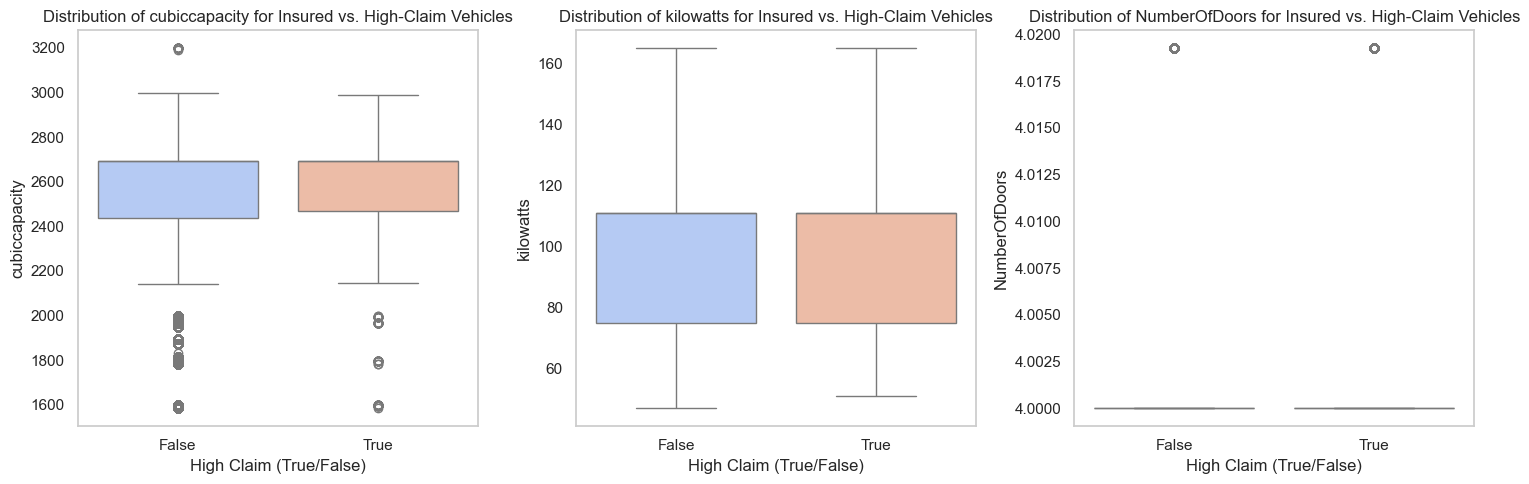

In [137]:
df['IsHighClaim'] = df['TotalClaims'] > df['TotalPremium']
performance_features = ['cubiccapacity', 'kilowatts', 'NumberOfDoors']

plt.figure(figsize=(15, 5))
for i, feature in enumerate(performance_features, 1):
    plt.subplot(1, 3, i)  # 1 row, 3 columns, i-th subplot
    sns.boxplot(data=df, x='IsHighClaim', y=feature, palette="coolwarm")
    plt.title(f"Distribution of {feature} for Insured vs. High-Claim Vehicles")
    plt.xlabel("High Claim (True/False)")
    plt.ylabel(feature)
    plt.grid(axis='y')

plt.tight_layout()
plt.show()

### Safety Features Impact

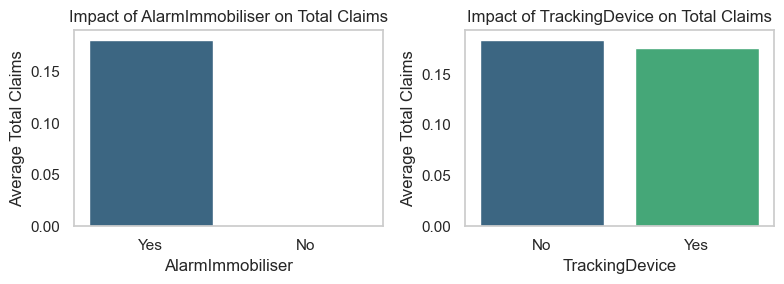

In [136]:
safety_features = ['AlarmImmobiliser', 'TrackingDevice']

plt.figure(figsize=(8, 3))
for i, feature in enumerate(safety_features, 1):
    plt.subplot(1, 2, i)
    
    sns.barplot(data=df, x=feature, y='TotalClaims', ci=None, estimator='mean', palette="viridis")
    plt.title(f"Impact of {feature} on Total Claims")
    plt.xlabel(feature)
    plt.ylabel("Average Total Claims")
    plt.grid(axis='y')

plt.tight_layout()
plt.show()


- **AlarmImmobiliser**:  
  - Vehicles with **AlarmImmobiliser** (`Yes`) have a higher average **TotalClaims** (`0.181`) compared to those without it (`0.000`).
  
- **TrackingDevice**:  
  - Vehicles with **TrackingDevice** (`No`) have a slightly higher average **TotalClaims** (`0.184`) than those with a **TrackingDevice** (`Yes`) which have `0.176`.

**Insight**: The presence of **AlarmImmobiliser** appears to correlate with higher claims, whereas **TrackingDevice** has a minimal impact on the claims frequency.

### Correlation between Engine Features and Insurance Metrics

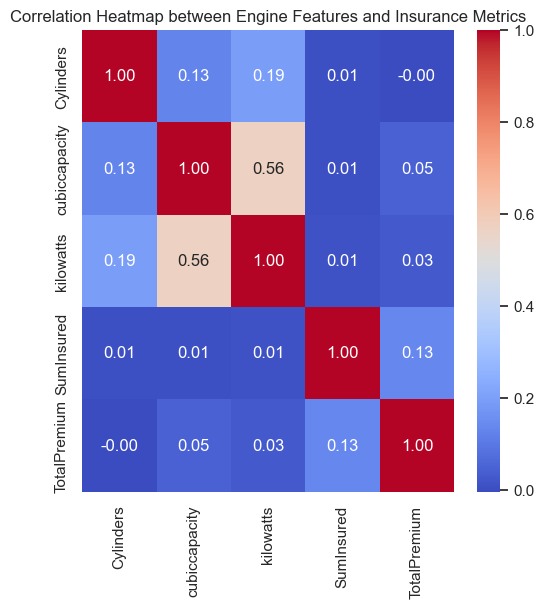

In [127]:
# Correlation between engine features and SumInsured/TotalPremium
engine_features = ['Cylinders', 'cubiccapacity', 'kilowatts']
insurance_features = ['SumInsured', 'TotalPremium']

correlation_matrix = df[engine_features + insurance_features].corr()

# Visualize correlations using heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt='.2f')
plt.title("Correlation Heatmap between Engine Features and Insurance Metrics")
plt.grid()
plt.show()


- **Cylinders**: Minimal impact on insurance metrics (`SumInsured` and `TotalPremium`).
- **Cubiccapacity**: Weak correlation with insurance metrics, but moderately correlated with `kilowatts` (engine power).
- **Kilowatts**: Shows moderate correlation with `cubiccapacity` and minimal effect on insurance values.
- **SumInsured and TotalPremium**: Slight positive correlation, indicating insurance amounts and premiums increase together.

**Insight**: Engine features have a limited effect on insurance values; engine size and power are more closely related than their impact on premiums.

## <font color = '#DF9166' size=6>**Client Analysis**<font/><a class = 'anchor' id = 'client_analysis'/>

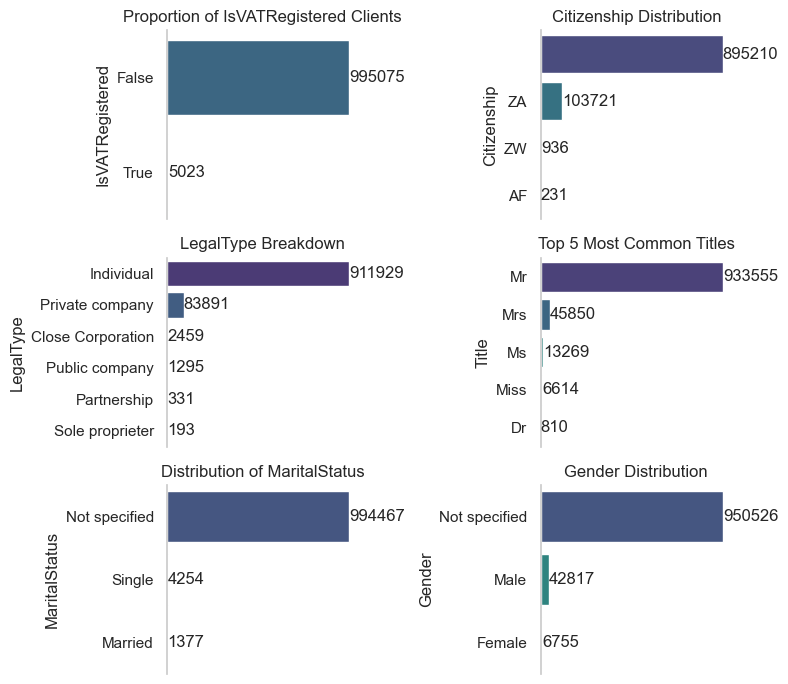

In [78]:
columns = ['IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'MaritalStatus', 'Gender']
titles = [
    "Proportion of IsVATRegistered Clients",
    "Citizenship Distribution",
    "LegalType Breakdown",
    "Top 5 Most Common Titles",
    "Distribution of MaritalStatus",
    "Gender Distribution"
]

plt.figure(figsize=(8, 7))
for i, (col, title) in enumerate(zip(columns, titles), 1):
    plt.subplot(3, 2, i)

    value_counts = df[col].value_counts(normalize=False).sort_values(ascending=False)    
    sns.barplot(
        x=value_counts.values,
        y=value_counts.index,
        palette='viridis'
    )
    
    # Annotate bars with values
    for index, value in enumerate(value_counts.values):
        plt.text(value, index, f'{value}', va='center', ha='left')
    
    plt.title(title)
    plt.ylabel(col)
    
    plt.grid(False)
    sns.despine(left=False, bottom=True)
    plt.xlabel("")
    plt.xticks([])

plt.tight_layout()
plt.show()


**Insights**:

- **VAT Registration**: The majority of clients (99.5%) are not VAT-registered, with only 0.5% registered.  
- **Citizenship**: Most clients (89.5%) have no citizenship listed, while 10.4% are South African (ZA).  
- **Legal Type**: Individuals dominate the dataset (91%), followed by private companies (8.3%).  
- **Title**: "Mr" is the most common title (93.3%), with "Mrs" (4.6%) and "Ms" (1.3%) trailing far behind.  
- **Language**: All clients prefer English.  
- **Bank Usage**: First National Bank (40.7%) is the most common, followed by ABSA Bank (20.5%) and Standard Bank (18.2%).  
- **Account Type**: Current accounts are most popular (63.8%), with savings accounts (35.8%) being secondary.  
- **Marital Status**: Marital status is largely unspecified (99.4%), with only 0.6% detailing their status.  
- **Gender**: Gender is mostly unspecified (95%), with males (4.3%) outnumbering females (0.7%).  

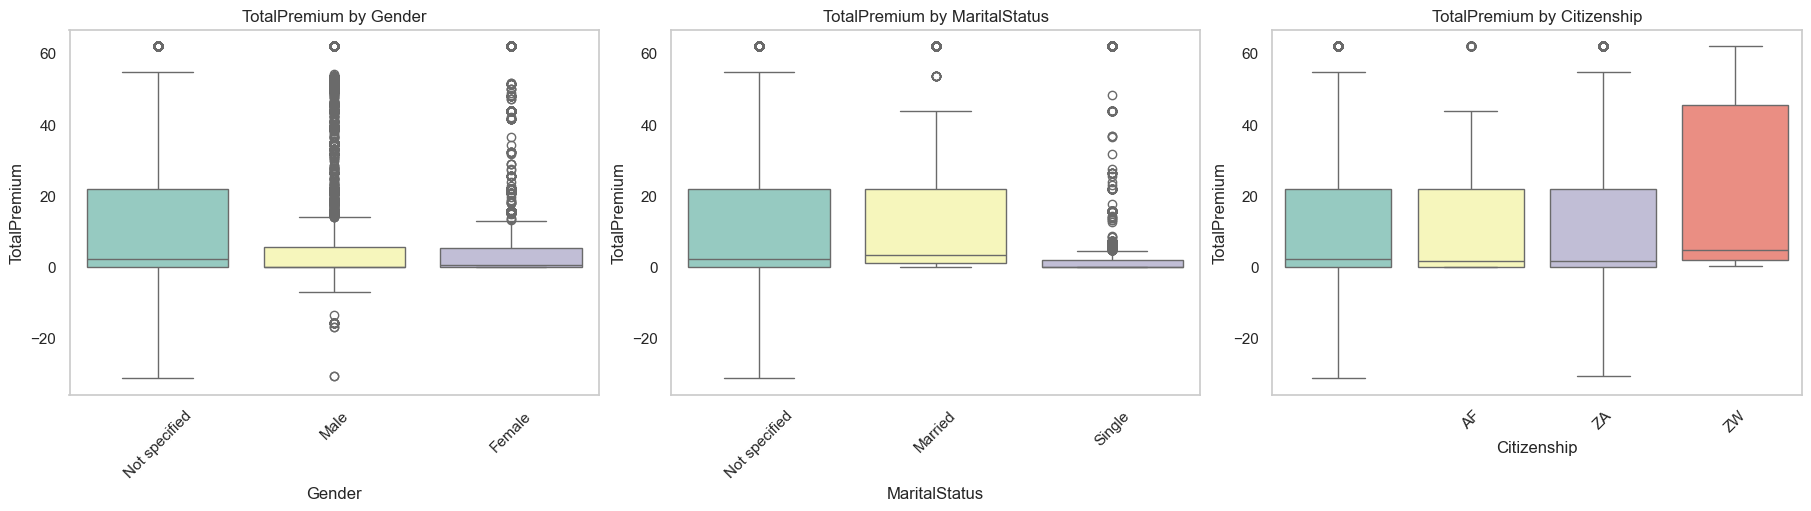

In [268]:
columns = ['Gender', 'MaritalStatus', 'Citizenship']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5), constrained_layout=True)
for i, col in enumerate(columns):
    sns.boxplot(data=df, x=col, y='TotalPremium', palette='Set3', ax=axes[i])
    axes[i].set_title(f"TotalPremium by {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("TotalPremium")
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].grid(axis='y')
plt.show()

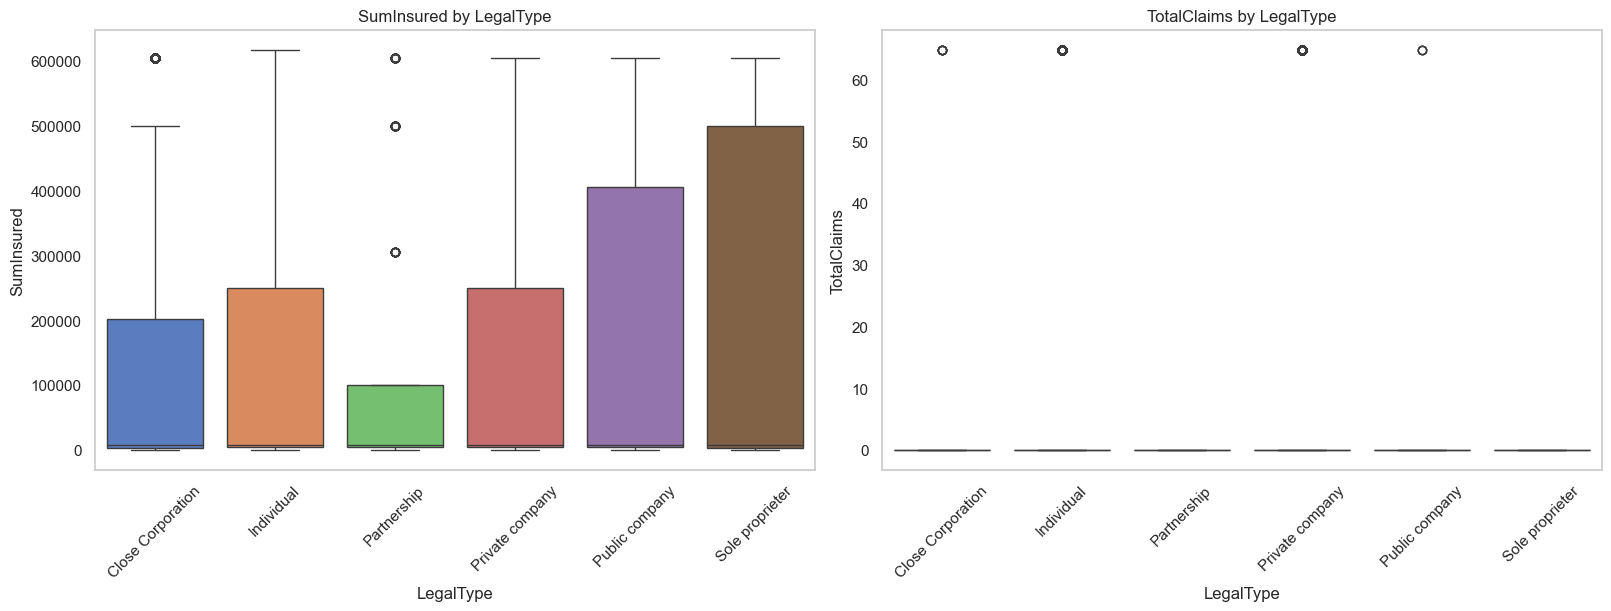

In [269]:

metrics = ['SumInsured', 'TotalClaims']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6), constrained_layout=True)
for i, col in enumerate(metrics):
    sns.boxplot(data=df, x='LegalType', y=col, palette='muted', ax=axes[i])
    axes[i].set_title(f"{col} by LegalType")
    axes[i].set_xlabel("LegalType")
    axes[i].set_ylabel(col)
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].grid(axis='y')
plt.show()


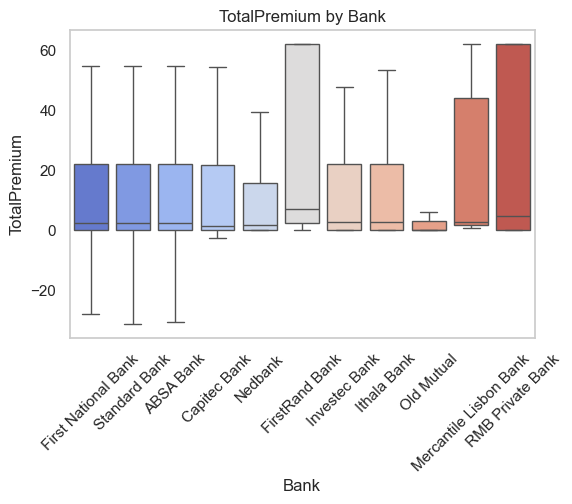

In [271]:
# Patterns in preferred and Bank with premium payment
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='Bank', y='TotalPremium', palette='coolwarm', showfliers=False)
plt.title(f"TotalPremium by Bank")
plt.xlabel('Bank')
plt.ylabel("TotalPremium")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()



## <font color = '#DF9166' size=6>**Region Analysis**<font/><a class = 'anchor' id = 'region_analysis'/>


Top 10 Country:
Country
South Africa    1000098
Name: count, dtype: int64


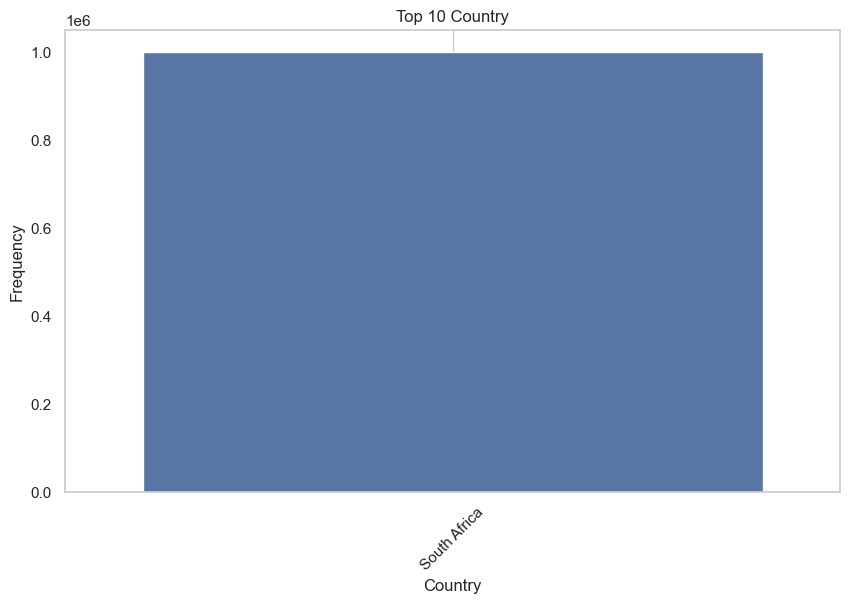


Top 10 Province:
Province
Gauteng          393865
Western Cape     170796
KwaZulu-Natal    169781
North West       143287
Mpumalanga        52718
Eastern Cape      30336
Limpopo           24836
Free State         8099
Northern Cape      6380
Name: count, dtype: int64


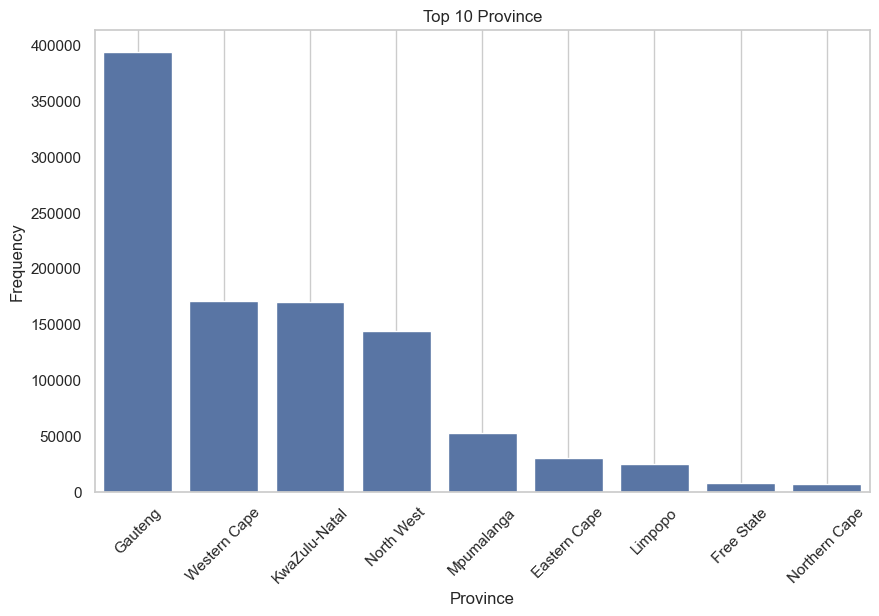


Top 10 PostalCode:
PostalCode
2000    133498
122      49171
7784     28585
299      25546
7405     18518
458      13775
8000     11794
2196     11048
470      10226
7100     10161
Name: count, dtype: int64


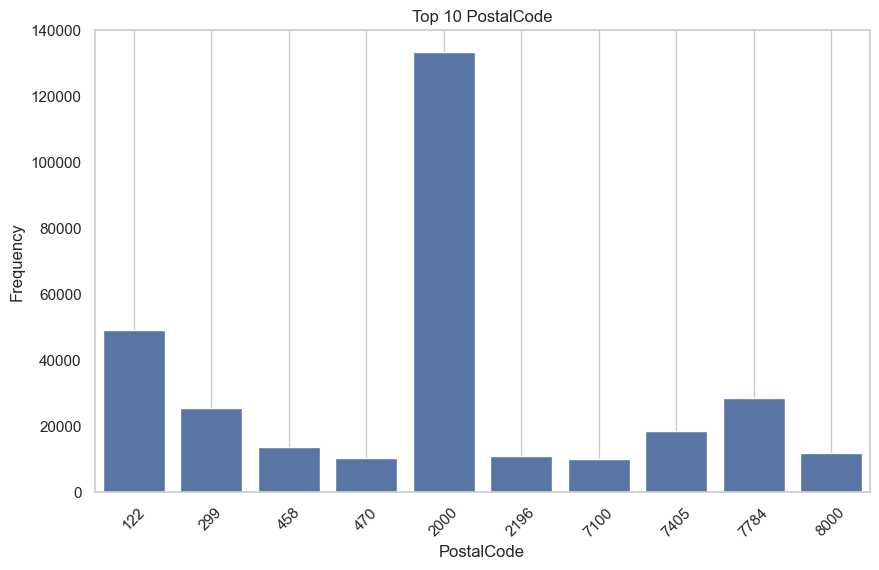


Top 10 MainCrestaZone:
MainCrestaZone
Transvaal (all except Pretoria)                296187
Johannesburg                                   176020
Transvaal (Pretoria)                           100331
Cape Province (Cape Town)                       95936
Natal                                           88266
Natal (Durban)                                  82859
Karoo 1 (Northeast of Cape Town)                52732
Rand East                                       42168
Tembu 2, Cape Mid 2, Cape Mid West, Tembu 1     20191
Cape Province (East and North of Cape Town)     19391
Name: count, dtype: int64


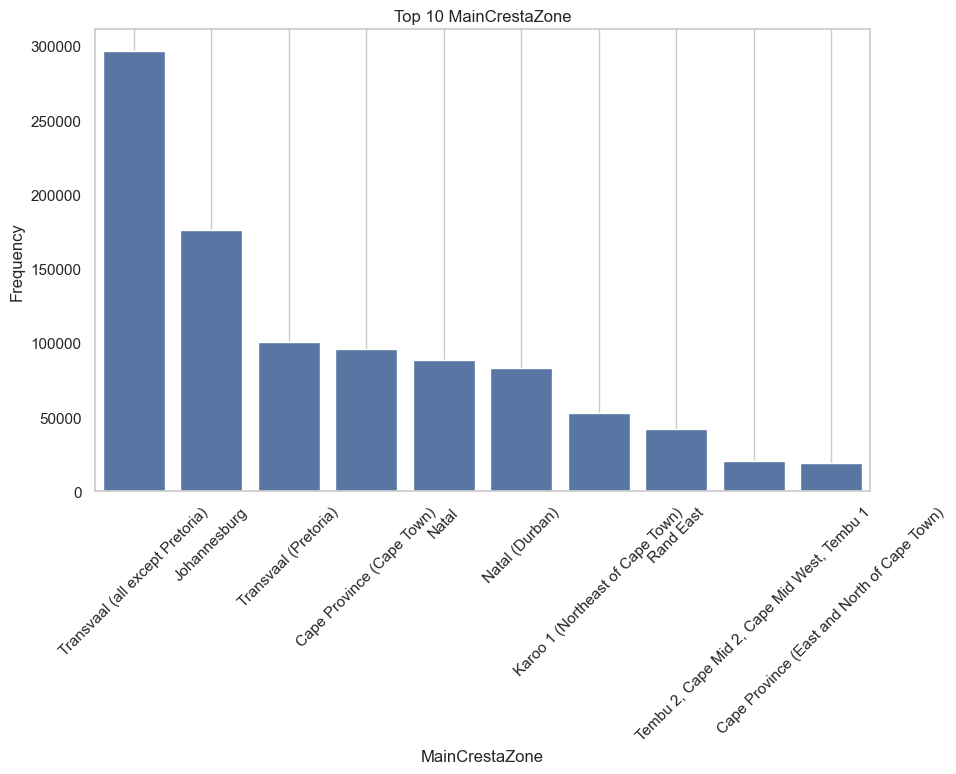


Top 10 SubCrestaZone:
SubCrestaZone
Johannesburg            176020
Pretoria                100331
Cape Town                95936
Durban                   82859
Transvaal North          75141
Transvaal North West     72558
Northeast of CT          51386
Transvaal East           45729
Transvaal South          45571
Rand East                42168
Name: count, dtype: int64


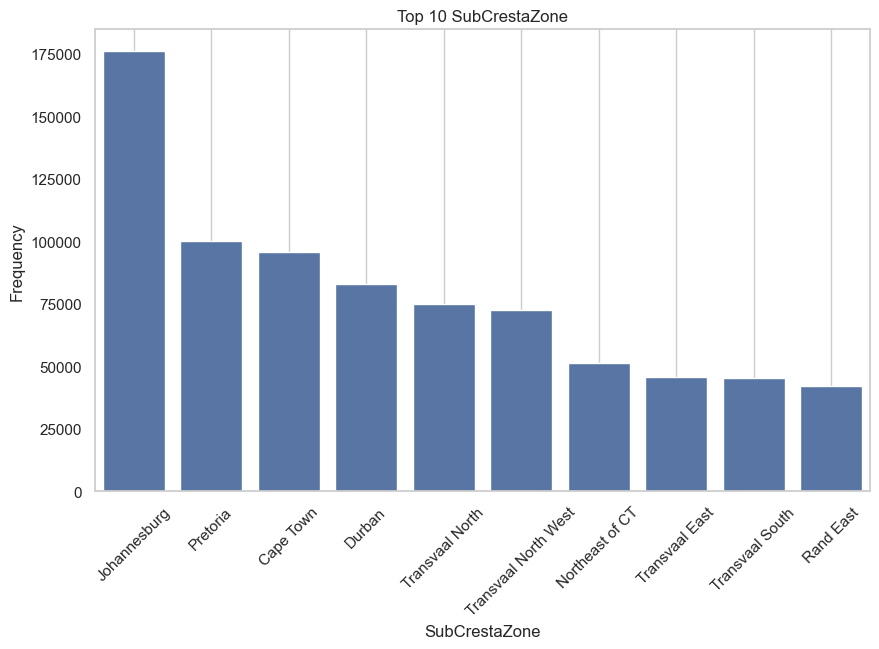

In [273]:
# Geographical Analysis
geo_columns = ['Country', 'Province', 'PostalCode', 'MainCrestaZone', 'SubCrestaZone']

for col in geo_columns:
    print(f"\nTop 10 {col}:")
    print(df[col].value_counts().head(10))

    plt.figure(figsize=(10, 6))
    sns.barplot(x=df[col].value_counts().head(10).index,
                y=df[col].value_counts().head(10).values)
    plt.title(f"Top 10 {col}")
    plt.xticks(rotation=45)
    plt.ylabel("Frequency")
    plt.grid()
    plt.show()

### Client Location

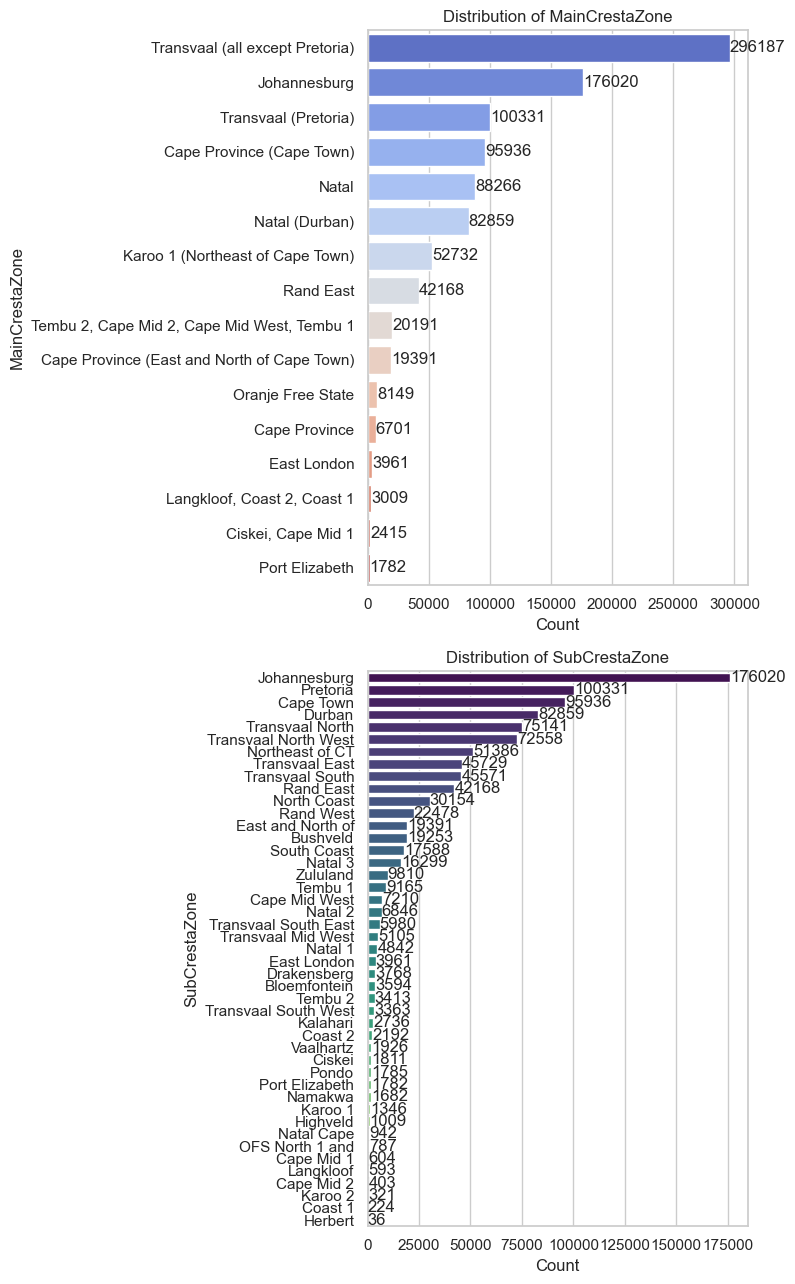

In [240]:
main_cresta_zone_distribution = df['MainCrestaZone'].value_counts()
sub_cresta_zone_distribution = df['SubCrestaZone'].value_counts()

features = ['MainCrestaZone', 'SubCrestaZone']
distributions = [main_cresta_zone_distribution, sub_cresta_zone_distribution]
palettes = ['coolwarm', 'viridis']

plt.figure(figsize=(8, 13))

# Loop through features and plot
for idx, (feature, distribution, palette) in enumerate(zip(features, distributions, palettes), start=1):
    plt.subplot(2, 1, idx)
    sns.barplot(x=distribution.values, y=distribution.index, palette=palette, orient='h')
    plt.title(f"Distribution of {feature}")
    plt.xlabel("Count")
    plt.ylabel(feature)
    # Add values to the bars
    for i, value in enumerate(distribution.values):
        plt.text(value + 0.5, i, f'{value}', va='center')

plt.tight_layout()
plt.show()

**Insights**

- **South Africa** is the only country in the dataset, contributing **100%** of the policies.

- Province-Level:
    - **Gauteng** leads with the highest number of policies (**39.38%**), followed by **Western Cape** (**17.08%**) and **KwaZulu-Natal** (**16.98%**).
    - **Northern Cape** and **Free State** have the lowest policy counts, with proportions under **1%**.

- MainCrestaZone-Level:
    - **Top Zones**: 
        - Transvaal (except Pretoria) (**296,187 policies**), 
        - Johannesburg (**176,020**), 
        - Transvaal (Pretoria) (**100,331**).
    - Zones like **Port Elizabeth**, **Langkloof**, and **Ciskei** have significantly fewer policies (below **5,000**).

- SubCrestaZone-Level:
    - **Dominant Zones**:
        - Johannesburg (**176,020 policies**),
        - Pretoria (**100,331**),
        - Cape Town (**95,936**).
    - Subzones like **Herbert**, **Coast 1**, and **Karoo 2** have the least policies, with counts under **500**.

- The dataset is concentrated in **South Africa**, with policy distribution heavily skewed toward major provinces and urban zones.

### Analysis by Location 

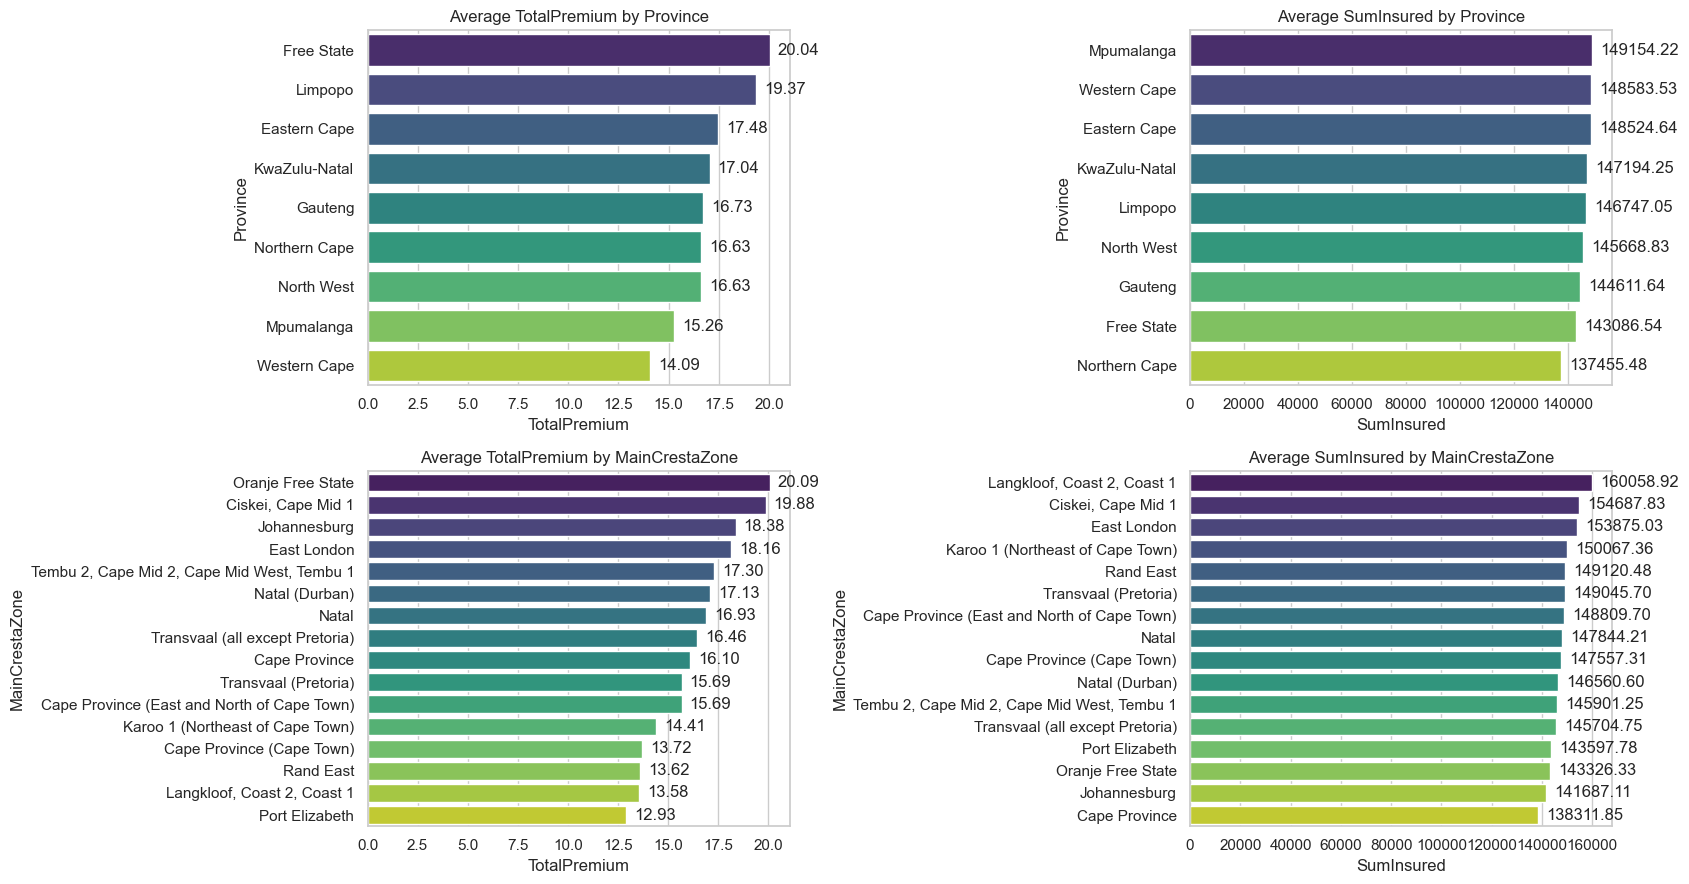

In [227]:
# Analyze TotalPremium and SumInsured by Province and MainCrestaZone
geographical_columns = ['Province', 'MainCrestaZone']
metrics = ['TotalPremium', 'SumInsured']

# Set up the figure with subplots
fig, axes = plt.subplots(len(geographical_columns), len(metrics), figsize=(17, 9))
axes = axes.flatten()

for i, geo_col in enumerate(geographical_columns):
    for j, metric in enumerate(metrics):
        ax = axes[i * len(metrics) + j]
        # Calculate mean values and sort them in descending order
        data_to_plot = (
            df.groupby(geo_col)[metric]
            .mean()
            .sort_values(ascending=False)
            .reset_index()
        )
        sns.barplot(data=data_to_plot, x=metric, y=geo_col, ci=None, palette="viridis", ax=ax)
        ax.set_title(f"Average {metric} by {geo_col}")
        ax.set_xlabel(metric)
        ax.set_ylabel(geo_col)
        for k, value in enumerate(data_to_plot[metric]):
            ax.text(value + 0.02 * max(data_to_plot[metric]), k, f'{value:.2f}', va='center')

plt.tight_layout()
plt.show()


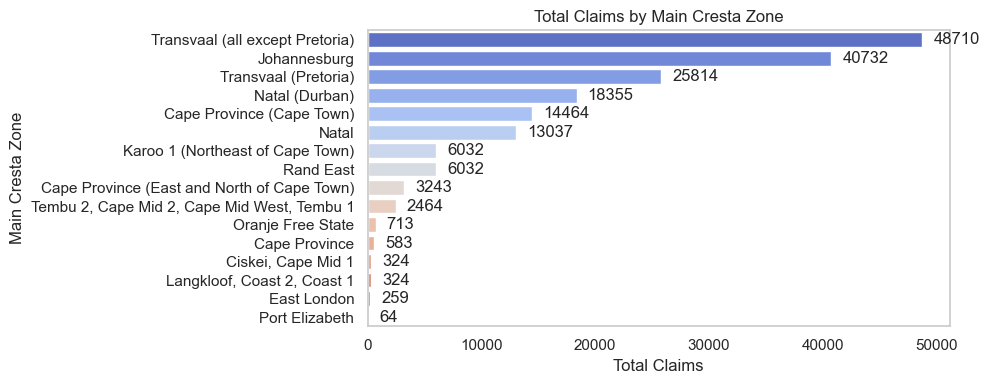

In [253]:
# Identify high-claim zones based on TotalClaims
high_claim_zones = df.groupby('MainCrestaZone')['TotalClaims'].sum().sort_values(ascending=False).reset_index()

# Plot as horizontal bar chart
plt.figure(figsize=(10, 4))
sns.barplot(
    x='TotalClaims', 
    y='MainCrestaZone', 
    data=high_claim_zones, 
    palette='coolwarm', 
    orient='h'
)

plt.title("Total Claims by Main Cresta Zone")
plt.xlabel("Total Claims")
plt.ylabel("Main Cresta Zone")
plt.grid(axis='x')

# Add values to each bar
for i, value in enumerate(high_claim_zones['TotalClaims']):
    plt.text(value + 0.02 * high_claim_zones['TotalClaims'].max(), i, f'{int(value)}', va='center')

plt.tight_layout()
plt.show()


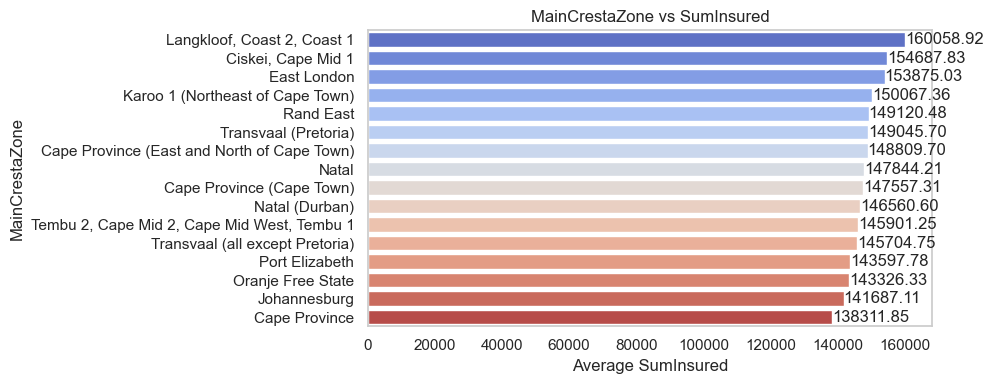

In [250]:
# Analyze the relationship between MainCrestaZone and SumInsured
maincresta_suminsured = df.groupby('MainCrestaZone').agg({'SumInsured': 'mean'}).sort_values(by='SumInsured', ascending=False).reset_index()

plt.figure(figsize=(10, 4))
sns.barplot(x='SumInsured', y='MainCrestaZone', data=maincresta_suminsured, palette='coolwarm', orient='h')
plt.title('MainCrestaZone vs SumInsured')
plt.xlabel('Average SumInsured')
plt.ylabel('MainCrestaZone')

# Add values to the bars
for index, value in enumerate(maincresta_suminsured['SumInsured']):
    plt.text(value + 0.5, index, f'{value:.2f}', va='center')

plt.grid(axis='x')
plt.tight_layout()
plt.show()


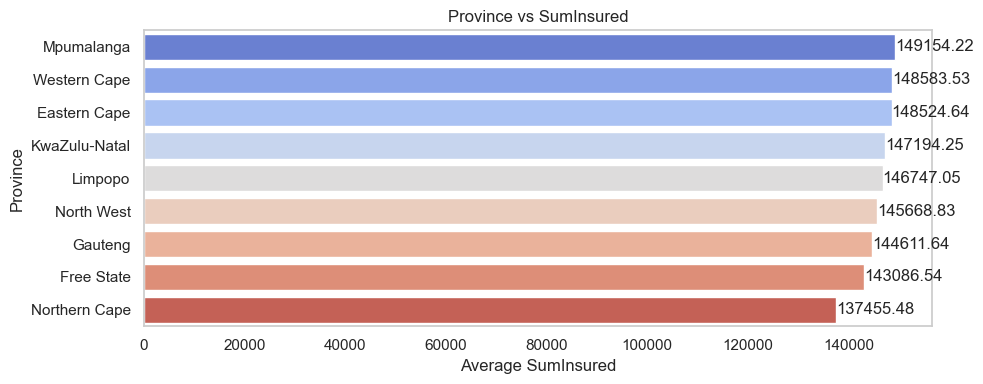

In [263]:
# Analyze the relationship between MainCrestaZone and SumInsured
maincresta_suminsured = df.groupby('Province').agg({'SumInsured': 'mean'}).sort_values(by='SumInsured', ascending=False).reset_index()

plt.figure(figsize=(10, 4))
sns.barplot(x='SumInsured', y='Province', data=maincresta_suminsured, palette='coolwarm', orient='h')
plt.title('Province vs SumInsured')
plt.xlabel('Average SumInsured')
plt.ylabel('Province')

# Add values to the bars
for index, value in enumerate(maincresta_suminsured['SumInsured']):
    plt.text(value + 0.5, index, f'{value:.2f}', va='center')

plt.grid(axis='x')
plt.tight_layout()
plt.show()


## <font color = '#DF9166' size=6>**Policy Analysis**<font/><a class = 'anchor' id = 'policy_analysis'/>

In [255]:
# Count of unique PolicyID entries
unique_policy_ids = df['PolicyID'].nunique()
print(f"\nNumber of unique PolicyID entries: {unique_policy_ids}")


Number of unique PolicyID entries: 7000


### Policy Durations

In [210]:
df['TermFrequency'].value_counts()

TermFrequency
Monthly    999554
Annual        544
Name: count, dtype: int64

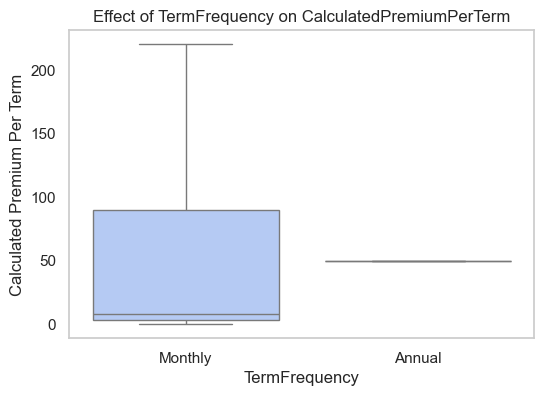

In [211]:
# Analyze the distribution of TermFrequency and its effect on CalculatedPremiumPerTerm
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='TermFrequency', y='CalculatedPremiumPerTerm', palette="coolwarm")
plt.title("Effect of TermFrequency on CalculatedPremiumPerTerm")
plt.xlabel("TermFrequency")
plt.ylabel("Calculated Premium Per Term")
plt.grid(axis='y')
plt.show()

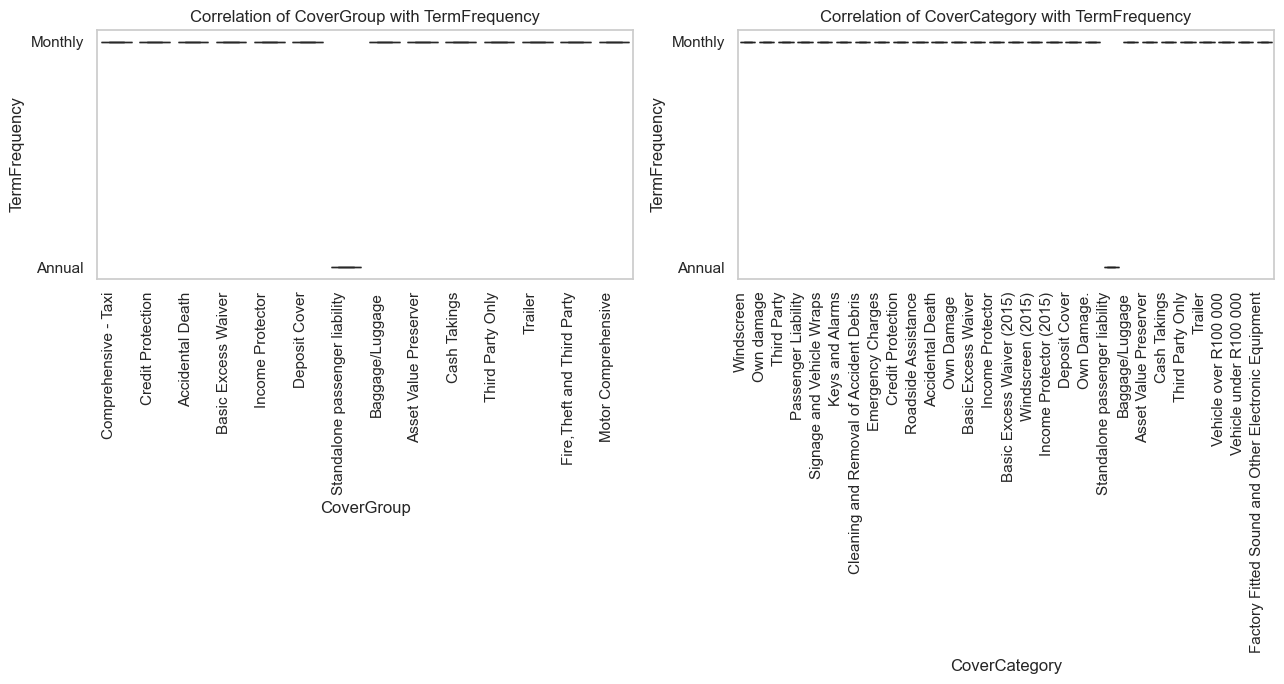

In [212]:
# Study how CoverGroup and CoverCategory correlate with TermFrequency
cover_features = ['CoverGroup', 'CoverCategory']

# Create a subplot with two plots
plt.figure(figsize=(13, 7))

# Loop through features to create subplots
for idx, feature in enumerate(cover_features, start=1):
    plt.subplot(1, 2, idx)  # 1 row, 2 columns, current index
    sns.boxplot(data=df, x=feature, y='TermFrequency', palette="viridis")
    plt.title(f"Correlation of {feature} with TermFrequency")
    plt.xlabel(feature)
    plt.ylabel("TermFrequency")
    plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels
    plt.grid(axis='y')

plt.tight_layout()
plt.show()


### Plan Preferences

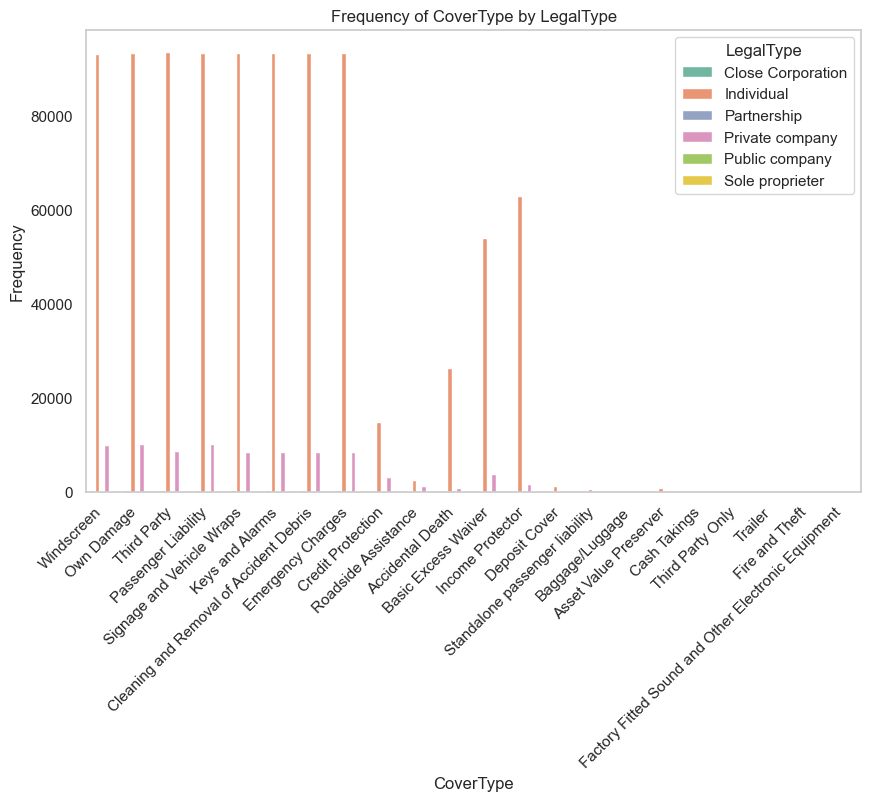

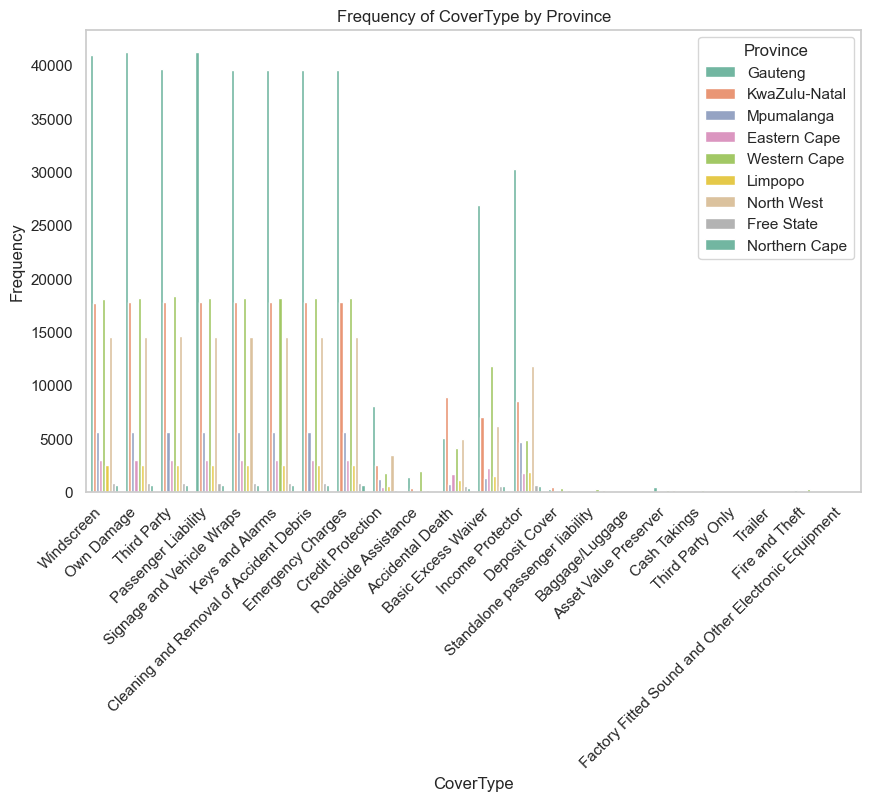

In [213]:
# Frequency of CoverType by Client LegalType or Region
group_features = ['LegalType', 'Province']

for feature in group_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x='CoverType', hue=feature, palette="Set2")
    plt.title(f"Frequency of CoverType by {feature}")
    plt.xlabel("CoverType")
    plt.ylabel("Frequency")
    plt.xticks(rotation=45, ha='right')
    plt.legend(title=feature)
    plt.grid(axis='y')
    plt.show()

## <font color = '#DF9166' size=6>**Trend Analysis**<font/><a class = 'anchor' id = 'trend_analysis'/>

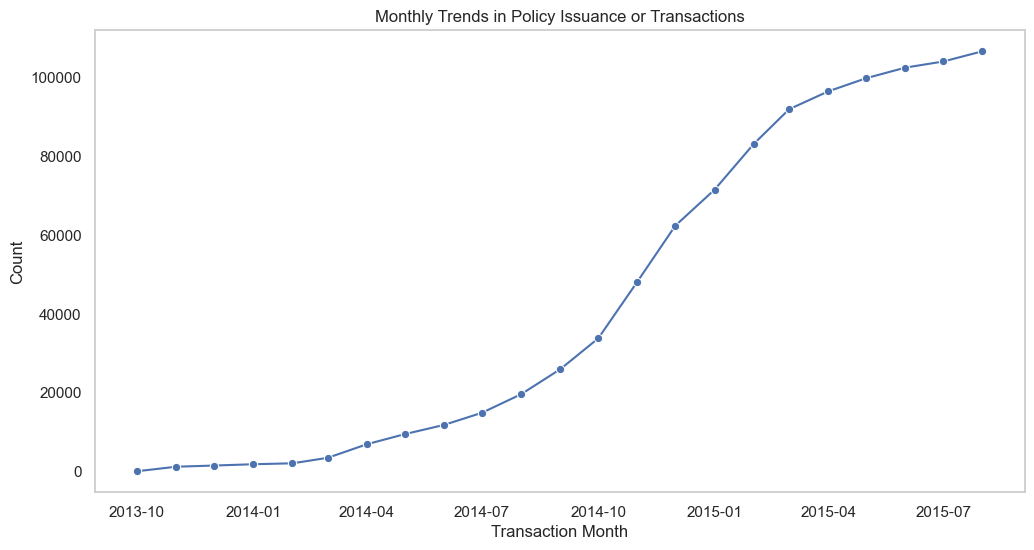

In [299]:
# Plotting monthly trends in policy issuance or transactions over time
monthly_trends = df.groupby('TransactionMonth').size()
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_trends, marker="o")
plt.title("Monthly Trends in Policy Issuance or Transactions")
plt.xlabel("Transaction Month")
plt.ylabel("Count")
plt.grid()
plt.show()


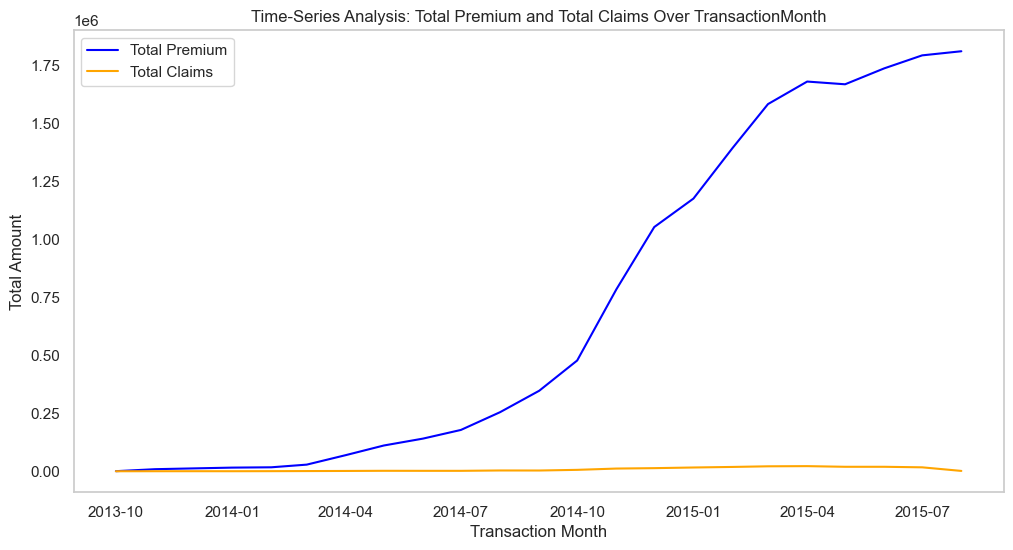

In [280]:
# Time-series analysis of TotalPremium and TotalClaims over TransactionMonth
df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'], errors='coerce')
time_series = df.groupby('TransactionMonth')[['TotalPremium', 'TotalClaims']].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=time_series, x='TransactionMonth', y='TotalPremium', label='Total Premium', color='blue')
sns.lineplot(data=time_series, x='TransactionMonth', y='TotalClaims', label='Total Claims', color='orange')
plt.title("Time-Series Analysis: Total Premium and Total Claims Over TransactionMonth")
plt.xlabel("Transaction Month")
plt.ylabel("Total Amount")
plt.legend()
plt.grid()
plt.show()

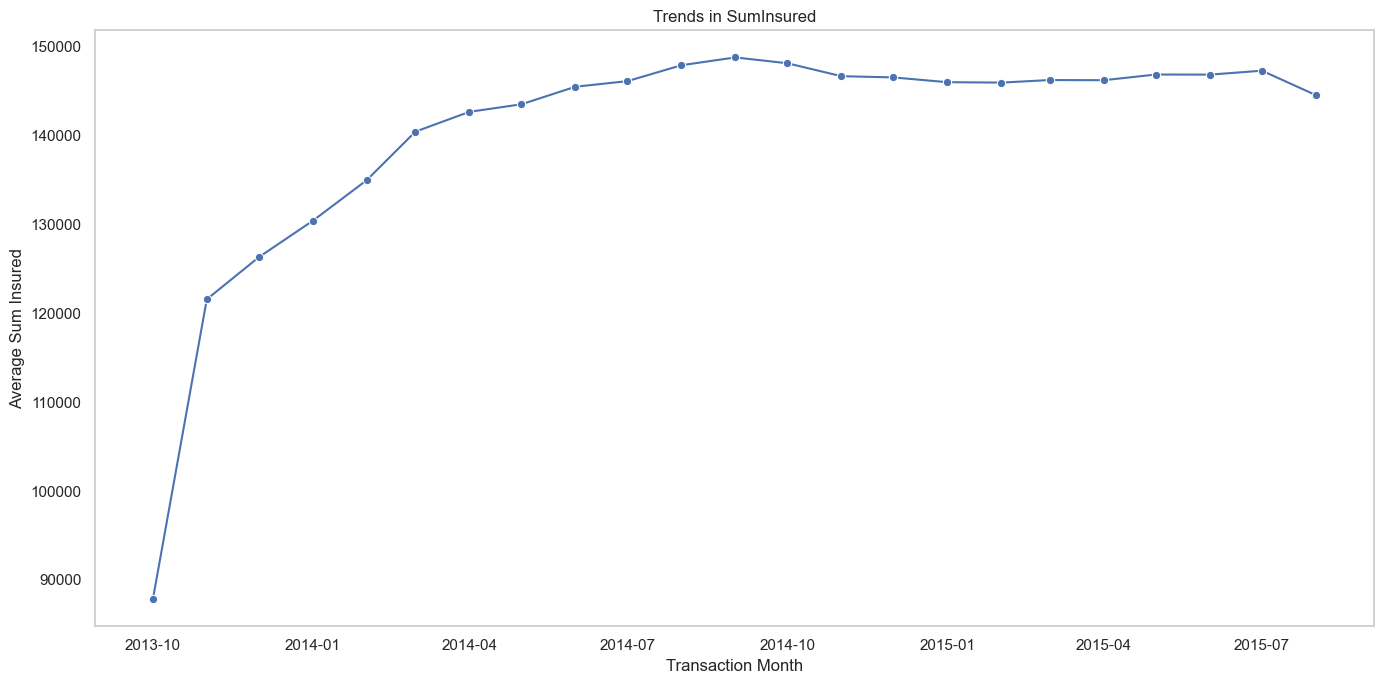

In [284]:
# Trends in SumInsured by Country
sum_insured_country = df.groupby(['TransactionMonth'])['SumInsured'].mean().reset_index()

plt.figure(figsize=(14, 7))
sns.lineplot(data=sum_insured_country, x='TransactionMonth', y='SumInsured', marker="o", palette='tab10')
plt.title("Trends in SumInsured")
plt.xlabel("Transaction Month")
plt.ylabel("Average Sum Insured")
plt.grid()
plt.tight_layout()
plt.show()


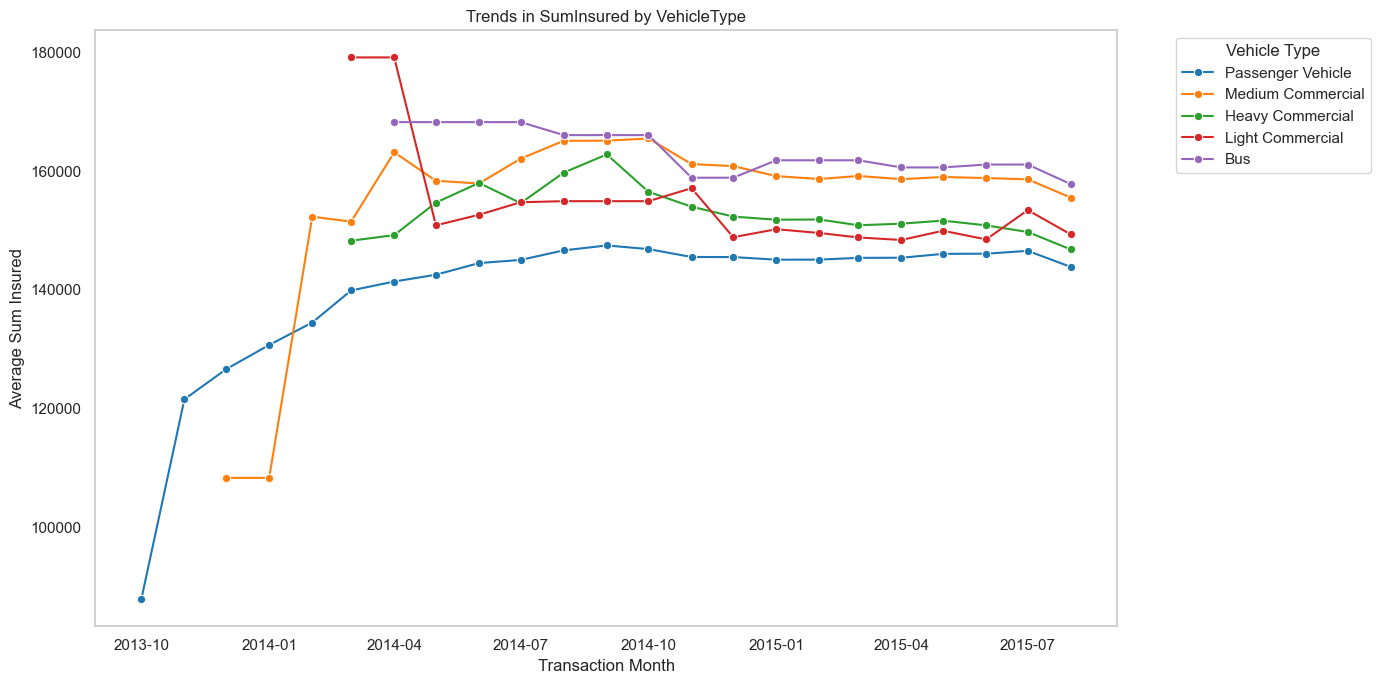

In [285]:
# Trends in SumInsured by VehicleType
sum_insured_vehicle = df.groupby(['TransactionMonth', 'VehicleType'])['SumInsured'].mean().reset_index()

plt.figure(figsize=(14, 7))
sns.lineplot(data=sum_insured_vehicle, x='TransactionMonth', y='SumInsured', hue='VehicleType', marker="o", palette='tab10')
plt.title("Trends in SumInsured by VehicleType")
plt.xlabel("Transaction Month")
plt.ylabel("Average Sum Insured")
plt.legend(title="Vehicle Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.tight_layout()
plt.show()

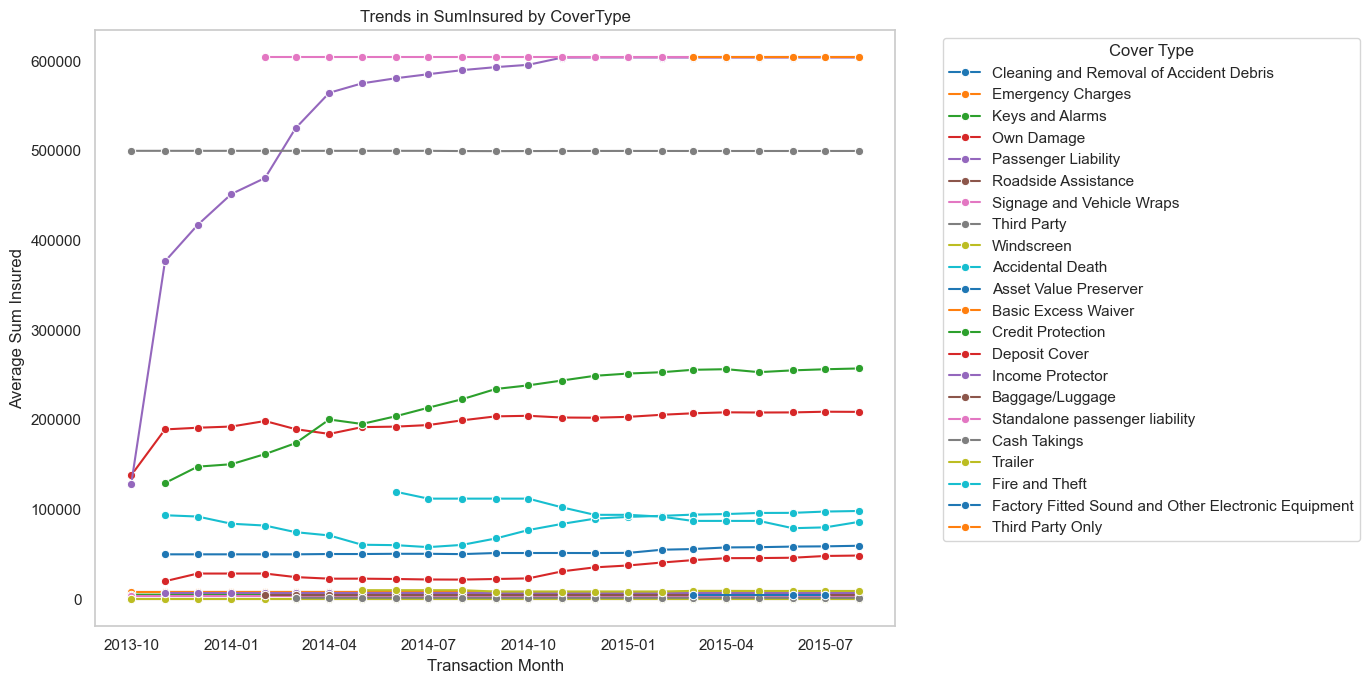

In [286]:
# Trends in SumInsured by CoverType
sum_insured_cover = df.groupby(['TransactionMonth', 'CoverType'])['SumInsured'].mean().reset_index()

plt.figure(figsize=(14, 7))
sns.lineplot(data=sum_insured_cover, x='TransactionMonth', y='SumInsured', hue='CoverType', marker="o", palette='tab10')
plt.title("Trends in SumInsured by CoverType")
plt.xlabel("Transaction Month")
plt.ylabel("Average Sum Insured")
plt.legend(title="Cover Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.tight_layout()
plt.show()
